In [1]:


import pandas as pd
from scipy import stats
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from bokeh.io import output_notebook
output_notebook()
from bokeh.plotting import figure
from bokeh.io import show
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pingouin as pg



Loading BokehJS ...

C:\Users\emman\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:

df = pd.read_csv("Surveydata_career_satisfaction.csv")
df.head()

,Career satisfaction,Career interest,Career longetivity desire,TIS,PES_1,PES_2,PES_3,PES_4,PES_5,PES_6,...,SES_1,SES_2,SES_3,SES_4,SES_5,SES_6,SES_7,FIS_1,FIS_2,FIS_3
0,1,Yes,Yes,No,Not important,Not important,Very important,Very important,Very important,Very important,...,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes
1,1,Yes,Yes,No,Not important,Not important,Not important,Important,Very important,Not important,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
2,5,Yes,Yes,Yes,Very important,Slightly important,Very important,Very important,Not important,Not important,...,Yes,Yes,Yes,Yes,No,No,Yes,No,No,Yes
3,4,Yes,Yes,Yes,Slightly important,Important,Important,Not important,Important,Important,...,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
4,5,Yes,Yes,No,Not important,Important,Fairly important,Fairly important,Slightly important,Slightly important,...,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes


In [3]:
df.isnull().sum()

Career satisfaction          0
Career interest              0
Career longetivity desire    0
TIS                          0
PES_1                        0
PES_2                        0
PES_3                        0
PES_4                        0
PES_5                        0
PES_6                        0
EIS_1                        0
EIS_2                        0
SES_1                        0
SES_2                        0
SES_3                        0
SES_4                        0
SES_5                        0
SES_6                        0
SES_7                        0
FIS_1                        0
FIS_2                        0
FIS_3                        0
dtype: int64

In [4]:
#Encoding

df['TIS'] = df['TIS'].map({'Yes': 1, 'No': 0})
df['FIS_1'] = df['FIS_1'].map({'Yes': 1, 'No': 0})
df['FIS_2'] = df['FIS_2'].map({'Yes': 1, 'No': 0})
df['FIS_3'] = df['FIS_3'].map({'Yes': 1, 'No': 0})
df['SES_1'] = df['SES_1'].map({'Yes': 1, 'No': 0})
df['SES_2'] = df['SES_2'].map({'Yes': 1, 'No': 0})
df['SES_3'] = df['SES_3'].map({'Yes': 1, 'No': 0})
df['SES_4'] = df['SES_4'].map({'Yes': 1, 'No': 0})
df['SES_5'] = df['SES_5'].map({'Yes': 1, 'No': 0})
df['SES_6'] = df['SES_6'].map({'Yes': 1, 'No': 0})
df['SES_7'] = df['SES_7'].map({'Yes': 1, 'No': 0})
df['Career interest'] = df['Career interest'].map({'Yes': 1, 'No': 0})
df['Career longetivity desire'] = df['Career longetivity desire'].map({'Yes': 1, 'No': 0})

df['PES_1'] = df['PES_1'].map({'Very important': 4, 'Important': 3, 'Fairly important': 2, 'Slightly important': 1, 'Not important': 0})
df['PES_2'] = df['PES_2'].map({'Very important': 4, 'Important': 3, 'Fairly important': 2, 'Slightly important': 1, 'Not important': 0})
df['PES_3'] = df['PES_3'].map({'Very important': 4, 'Important': 3, 'Fairly important': 2, 'Slightly important': 1, 'Not important': 0})
df['PES_4'] = df['PES_4'].map({'Very important': 4, 'Important': 3, 'Fairly important': 2, 'Slightly important': 1, 'Not important': 0})
df['PES_5'] = df['PES_5'].map({'Very important': 4, 'Important': 3, 'Fairly important': 2, 'Slightly important': 1, 'Not important': 0})
df['PES_6'] = df['PES_6'].map({'Very important': 4, 'Important': 3, 'Fairly important': 2, 'Slightly important': 1, 'Not important': 0})
df['EIS_1'] = df['EIS_1'].map({'Very important': 4, 'Important': 3, 'Fairly important': 2, 'Slightly important': 1, 'Not important': 0})
df['EIS_2'] = df['EIS_2'].map({'Very important': 4, 'Important': 3, 'Fairly important': 2, 'Slightly important': 1, 'Not important': 0})
# Display modified DataFrame
print("Modified DataFrame:\n",df)

Modified DataFrame:
      Career satisfaction  Career interest  Career longetivity desire  TIS  \
0                      1                1                          1    0   
1                      1                1                          1    0   
2                      5                1                          1    1   
3                      4                1                          1    1   
4                      5                1                          1    0   
..                   ...              ...                        ...  ...   
398                    4                1                          1    0   
399                    5                1                          1    0   
400                    5                1                          1    0   
401                    5                1                          1    1   
402                    5                1                          1    1   

     PES_1  PES_2  PES_3  PES_4  PES_5  PES_6  ...  SE

In [55]:
pg.cronbach_alpha(data=df, ci=.99)

(0.8410064665362864, array([0.81 , 0.869]))

### Formulating independent and dependent variables from the survey answers


In [6]:
df['CAREER SATISFACTION INDEX'] = (0.5*df['Career satisfaction']/5) + 0.25 * (df['Career interest'] + df['Career longetivity desire'])

In [5]:
df['Self Efficacy Score'] = (df['SES_1'] + df['SES_2']+ df['SES_3']+ df['SES_4']+ df['SES_5']+ df['SES_6']+ df['SES_7'])/7
df['Family Influence Score'] = (df['FIS_1'] + df['FIS_2']+ df['FIS_3'])/3
df['PES_Score'] = (df['PES_1'] + df['PES_2']+ df['PES_3']+ df['PES_4']+ df['PES_5']+ df['PES_6'])/6
df['EIS_score'] = (df['EIS_1'] + df['EIS_2'])/2




### Reliability  analysis


In [7]:
pg.cronbach_alpha(data=df, ci=.99)

(0.8743732202610586, array([0.85 , 0.896]))

In [8]:
df['Success/Failure'] = np.where(df['CAREER SATISFACTION INDEX']>0.5, 'Success', 'Failure')


In [9]:
df.head()

,Career satisfaction,Career interest,Career longetivity desire,TIS,PES_1,PES_2,PES_3,PES_4,PES_5,PES_6,...,SES_7,FIS_1,FIS_2,FIS_3,Self Efficacy Score,Family Influence Score,PES_Score,EIS_score,CAREER SATISFACTION INDEX,Success/Failure
0,1,1,1,0,0,0,4,4,4,4,...,0,1,1,1,0.571429,1.000000,2.666667,4.0,0.6,Success
1,1,1,1,0,0,0,0,3,4,0,...,1,1,1,0,1.000000,0.666667,1.166667,0.0,0.6,Success
2,5,1,1,1,4,1,4,4,0,0,...,1,0,0,1,0.714286,0.333333,2.166667,1.5,1.0,Success
3,4,1,1,1,1,3,3,0,3,3,...,1,1,1,1,0.714286,1.000000,2.166667,3.0,0.9,Success
4,5,1,1,0,0,3,2,2,1,1,...,1,1,1,1,0.714286,1.000000,1.500000,3.5,1.0,Success


In [10]:
types = df.dtypes
print(types)

Career satisfaction            int64
Career interest                int64
Career longetivity desire      int64
TIS                            int64
PES_1                          int64
PES_2                          int64
PES_3                          int64
PES_4                          int64
PES_5                          int64
PES_6                          int64
EIS_1                          int64
EIS_2                          int64
SES_1                          int64
SES_2                          int64
SES_3                          int64
SES_4                          int64
SES_5                          int64
SES_6                          int64
SES_7                          int64
FIS_1                          int64
FIS_2                          int64
FIS_3                          int64
Self Efficacy Score          float64
Family Influence Score       float64
PES_Score                    float64
EIS_score                    float64
CAREER SATISFACTION INDEX    float64
S

In [17]:
# Pairwise Pearson correlations
correlations = df[["CAREER SATISFACTION INDEX","Self Efficacy Score","Family Influence Score","PES_Score","EIS_score","TIS"]].corr(method='pearson')
print(correlations)

                           CAREER SATISFACTION INDEX  Self Efficacy Score  \
CAREER SATISFACTION INDEX                   1.000000             0.842799   
Self Efficacy Score                         0.842799             1.000000   
Family Influence Score                      0.769483             0.751710   
PES_Score                                   0.604795             0.637766   
EIS_score                                  -0.049668            -0.033376   
TIS                                         0.334211             0.310367   

                           Family Influence Score  PES_Score  EIS_score  \
CAREER SATISFACTION INDEX                0.769483   0.604795  -0.049668   
Self Efficacy Score                      0.751710   0.637766  -0.033376   
Family Influence Score                   1.000000   0.530367   0.010345   
PES_Score                                0.530367   1.000000   0.057495   
EIS_score                                0.010345   0.057495   1.000000   
TIS       

In [16]:
 df[["CAREER SATISFACTION INDEX","Self Efficacy Score","Family Influence Score","PES_Score","EIS_score","TIS"]].describe(include="all")

    

,CAREER SATISFACTION INDEX,Self Efficacy Score,Family Influence Score,PES_Score,EIS_score,TIS
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.736228,0.639135,0.658395,2.150538,2.063275,0.449132
std,0.353346,0.338458,0.401680,1.072974,1.622783,0.498024
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350000,0.285714,0.333333,1.500000,0.500000,0.000000
50%,1.000000,0.714286,0.666667,2.166667,2.000000,0.000000
75%,1.000000,0.857143,1.000000,3.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000


### Correlation between career satisfaction index and other indpendent variables.

In [61]:
df['CAREER SATISFACTION INDEX'].corr(df['Self Efficacy Score'],method='pearson')

0.8427992846203906

In [62]:
df['CAREER SATISFACTION INDEX'].corr(df['Family Influence Score'],method='pearson')

0.7694828129046246

In [63]:
df['CAREER SATISFACTION INDEX'].corr(df['PES_Score'],method='pearson')

0.6047945093498953

In [64]:
df['CAREER SATISFACTION INDEX'].corr(df['EIS_score'],method='pearson')

-0.04966771004164517

In [65]:
df['CAREER SATISFACTION INDEX'].corr(df['TIS'],method='pearson')

0.3342106126929708

### Visualisation : Scatter plots

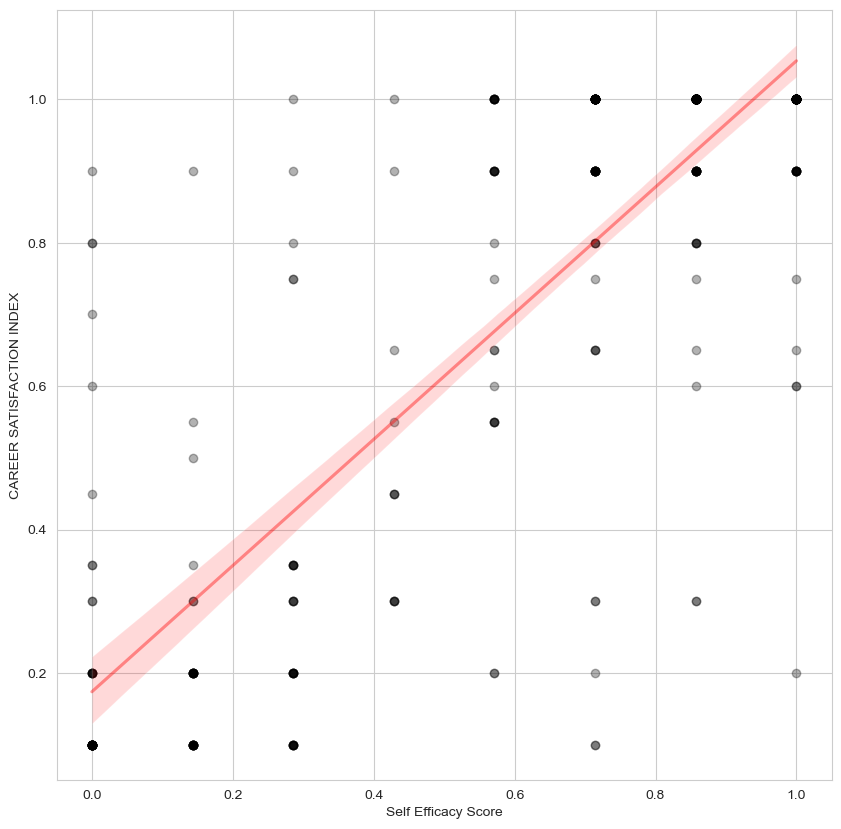

In [66]:
sns.set_style('whitegrid')
reg_ = sns.regplot(x='Self Efficacy Score', y='CAREER SATISFACTION INDEX', data = df,
scatter_kws = {'color': 'black', 'alpha':0.3},
line_kws = {'color': 'red', 'alpha':0.4})
reg_.figure.set_size_inches(10, 10)

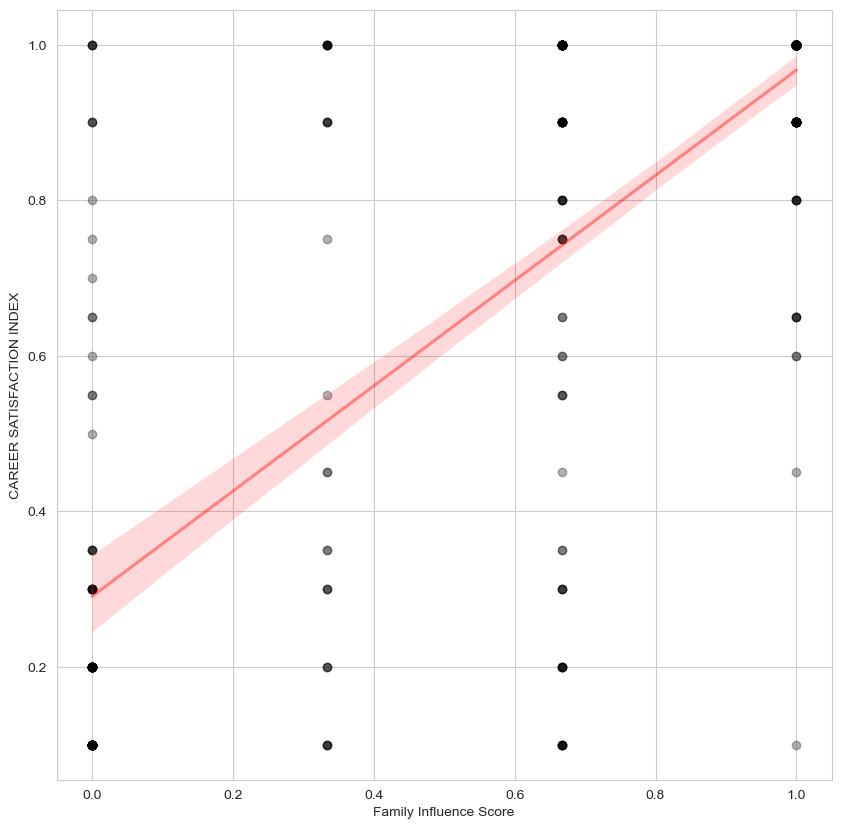

In [16]:
sns.set_style('whitegrid')
reg_ = sns.regplot(x='Family Influence Score', y='CAREER SATISFACTION INDEX', data = df,
scatter_kws = {'color': 'black', 'alpha':0.3},
line_kws = {'color': 'red', 'alpha':0.4})
reg_.figure.set_size_inches(10, 10)

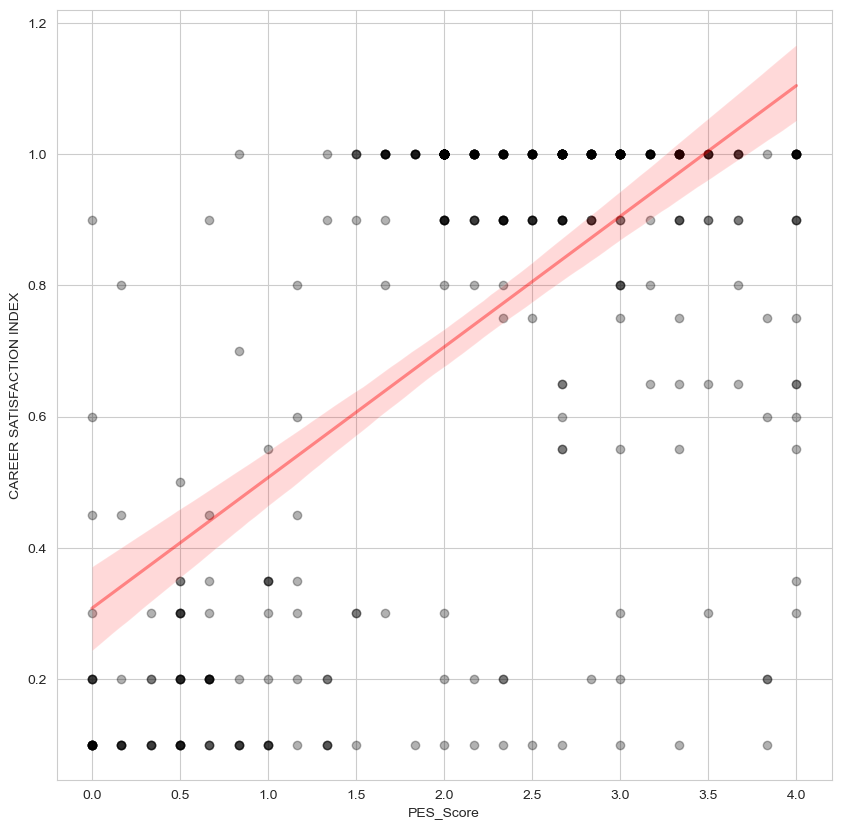

In [68]:
sns.set_style('whitegrid')
reg_ = sns.regplot(x='PES_Score', y='CAREER SATISFACTION INDEX', data = df,
scatter_kws = {'color': 'black', 'alpha':0.3},
line_kws = {'color': 'red', 'alpha':0.4})
reg_.figure.set_size_inches(10, 10)

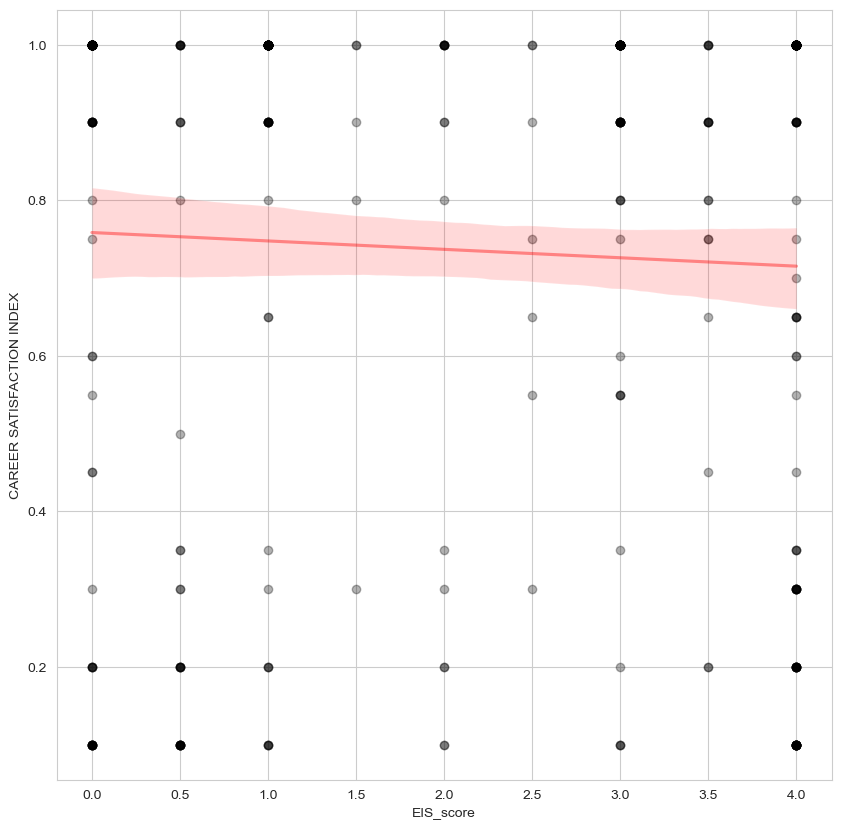

In [69]:
sns.set_style('whitegrid')
reg_ = sns.regplot(x='EIS_score', y='CAREER SATISFACTION INDEX', data = df,
scatter_kws = {'color': 'black', 'alpha':0.3},
line_kws = {'color': 'red', 'alpha':0.4})
reg_.figure.set_size_inches(10, 10)

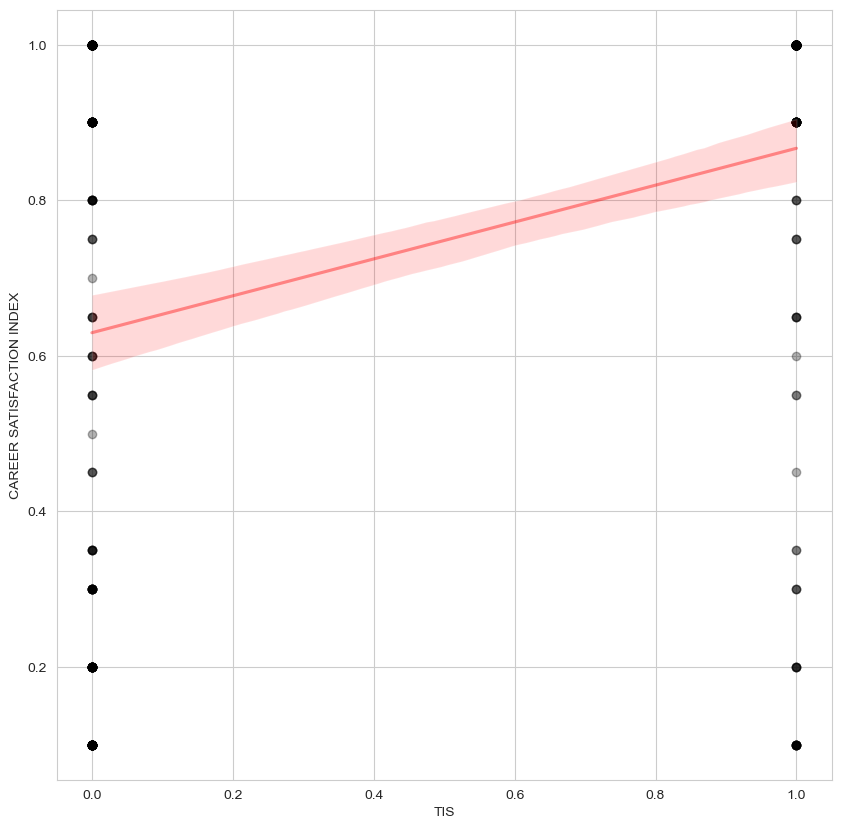

In [70]:
sns.set_style('whitegrid')
reg_ = sns.regplot(x='TIS', y='CAREER SATISFACTION INDEX', data = df,
scatter_kws = {'color': 'black', 'alpha':0.3},
line_kws = {'color': 'red', 'alpha':0.4})
reg_.figure.set_size_inches(10, 10)